In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib


In [6]:
analysis_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")
job_names = ["64_1", "65_2", "66_4", "67_8"]

score_dfs = list()
for job_name in job_names:
    score_dir = Path(analysis_dir, job_name)

    score_file = Path(score_dir, "sample_min_r_free_0.csv")
    score_df = pd.read_csv(score_file)
    score_dfs.append(score_df)
    print(np.mean(score_df["r_free_0"]), np.min(score_df["r_free_0"]))


0.26758675849743335 0.2663634549958511
0.26402227580718696 0.2604425155665613
0.2722879639720518 0.2661352314736462
0.2826414181824659 0.2763520054463144


In [7]:
font_size = 20
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

axes = {'labelsize': font_size}

xtick = {'labelsize': font_size}
ytick = {'labelsize': font_size}
legend = {'fontsize': font_size,
          'markerscale': 2,
          'title_fontsize': font_size,
          'loc': "lower left"}

matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('xtick', **xtick)
matplotlib.rc('ytick', **ytick)
matplotlib.rc('legend', **legend)

In [8]:

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

fig = plt.figure(figsize=(20,10))

for i in range(len(score_dfs)):
    n_state = 2**i
    score_df = score_dfs[i]
    x = i


    break

    # y = np.mean(score_df["xray_0_min_0_r_free_0"])
    # std = np.std(score_df["xray_0_min_0_r_free_0"])

    # min_val = np.min(score_df["xray_0_min_0_r_free_0"])

    # plt.scatter(x, np.mean(score_df["xray_0_min_0_r_free_0"]))
    # plt.errorbar(x, np.mean(score_df["xray_0_min_0_r_free_0"]), np.std(score_df["xray_0_min_0_r_free_0"]), linestyle='None', marker='o', capsize=3, c=colors[0])
    # plt.scatter(x, np.min(score_df["xray_0_min_0_r_free_0"]), c=colors[0])

    # plt.scatter(x, np.mean(score_df["xray_0_min_0_r_work_0"]), c=colors[1])
    # plt.errorbar(x, np.mean(score_df["xray_0_min_0_r_work_0"]), np.std(score_df["xray_0_min_0_r_work_0"]), linestyle='None', marker='o', capsize=3, c=colors[1])
    # plt.scatter(x, np.min(score_df["xray_0_min_0_r_work_0"]), c=colors[1])

# my_xticks = ["1-state",'2-state','4-state','8-state']
# plt.xticks(list(range(len(score_dfs))), my_xticks)

# custom_legend = list()
# custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
# custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))
# plt.legend(custom_legend, ['r_free', 'r_work'])

# fig_file = Path(Path.home(), "Desktop/n_state_score_distributions.png")
# plt.savefig(fig_file)


<Figure size 2000x1000 with 0 Axes>

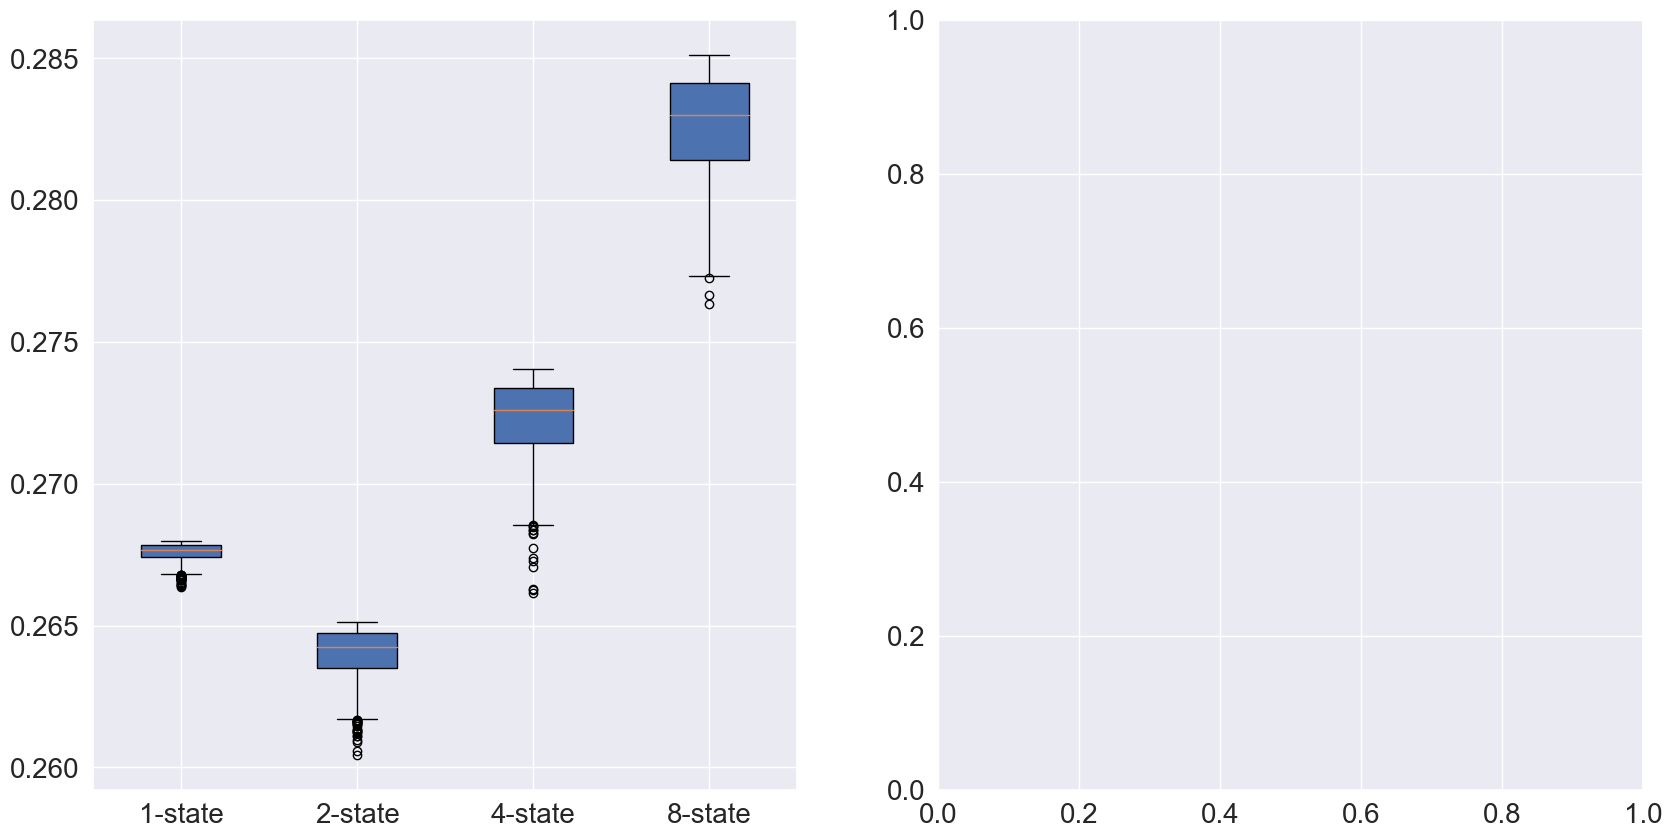

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

bplot1 = ax1.boxplot([score_df["r_free_0"] for score_df in score_dfs],
                    vert=True,
                    patch_artist=True,
                    labels=["{}-state".format(state) for state in [1,2,4,8]])
# bplot1 = ax2.boxplot([score_df["xray_0_min_0_r_work_0"] for score_df in score_dfs],
#                     vert=True,
#                     patch_artist=True,
#                     labels=["{}-state".format(state) for state in [1,2,4,8]])

fig_file = Path(Path.home(), "Desktop/n_state_score_distributions.png")
plt.savefig(fig_file)